In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt 

from scipy import stats
from scipy.stats import norm, skew
# import statsmodel.api as sm 


In [2]:
#load station one data into pandas 

df_station_one = pd.read_csv('Station_one.csv')

#index the data by date 
df_station_one['Date'] = pd.to_datetime(df_station_one['Date'],format = '%d/%m/%Y', errors = 'ignore')
df_station_one = df_station_one.set_index('Date')

#return thr first 5 rows
df_station_one.head(5)


,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [3]:
df_station_one.isnull()


,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2006-03-14,True,False,False,True,True,True,True
2006-03-15,True,False,False,True,True,True,True
2006-03-16,True,False,False,True,True,True,True
2006-03-17,True,False,False,True,True,True,True
2006-03-18,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...
2020-06-26,False,False,False,False,False,False,False
2020-06-27,False,False,False,False,False,False,False
2020-06-28,False,False,False,False,False,False,False


In [4]:
df_station_one = df_station_one[df_station_one.index >='2006-03-14']

In [5]:
def percentage_representation_of_missing_values(data, thresh=50,color='black', edgecolor='black',width=15,height=3):
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh} missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
def display_distribution(df):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
    sns.heatmap(df.T.isna(), cmap='Spectral')
    ax.set_title('Fields with Missing Values', fontsize=16)
    #for tick in ax.xaxis.get_major_ticks():
    #    tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    return plt.show()


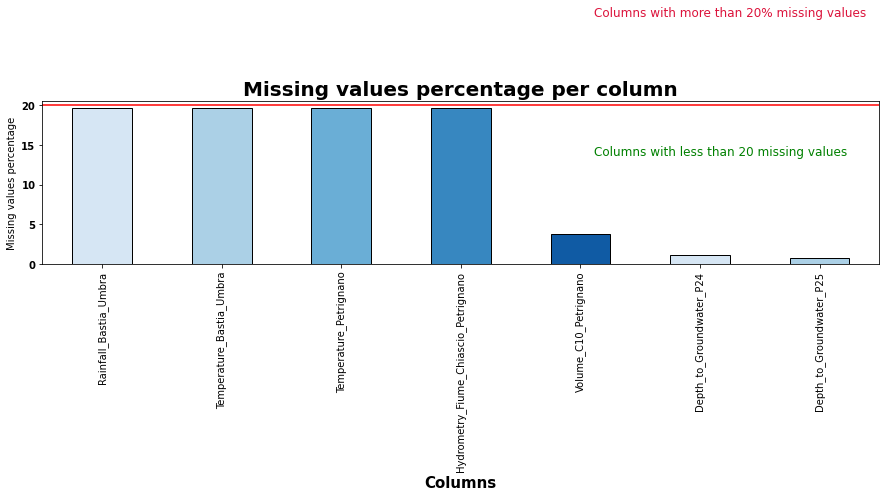

In [6]:
#display missing values distribution in percentages - more than 10 missing values
percentage_representation_of_missing_values(df_station_one,20,color=sns.color_palette('Blues',5))

In [7]:
#Rainfall,Temperature and Hydrometry seem to be missing the most data. We can work with all the data since they are missing only less than 20%

In [8]:
#Plot the data to get a better idea on cleaning the data

#get column names
df_station_one.columns

Index(['Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [9]:
#Group similar variables
Station_one_rainfall = ['Rainfall_Bastia_Umbra']
Station_one_groundwater = ['Depth_to_Groundwater_P24','Depth_to_Groundwater_P25']
Station_one_temperature = ['Temperature_Bastia_Umbra','Temperature_Petrignano']
Station_one_volume = ['Volume_C10_Petrignano']
Station_one_hydrometry = ['Hydrometry_Fiume_Chiascio_Petrignano']

In [10]:
#change the scale to logarithmic for data visualization
df_station_one['Volume_C10_Petrignano_log10'] = -np.log10(abs(df_station_one['Volume_C10_Petrignano']))
Station_one_volume_log = ['Volume_C10_Petrignano_log10']

#changing the scale may create infinite value so we replace 'inf' value by 'nan' values
df_station_one[Station_one_volume_log] = df_station_one[Station_one_volume_log].replace([np.inf, -np.inf],np.nan).fillna(0)

/home/moringa/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
def plot_data():
#separate columns into smaller dfs 
 df_Station_one_rainfall = df_station_one[Station_one_rainfall]
 df_Station_one_groundwater = df_station_one[Station_one_groundwater]
 df_Station_one_temperature = df_station_one[Station_one_temperature]
 df_Station_one_volume_log = df_station_one[Station_one_volume_log]
 df_Station_one_hydrometry = df_station_one[Station_one_hydrometry]

#plot data 
 ax = df_Station_one_groundwater.plot(figsize=(15,6), fontsize=12,linewidth=2)
 ax.set_xlabel('Date',fontsize=16)
 ax.set_ylabel('mm', fontsize=16)
 ax.set_title('Station One: Groundwater data', fontsize=16)
 ax.legend(bbox_to_anchor=(1,0,5,1), loc='lower center')
    
 ax1 = df_Station_one_volume_log.plot(figsize=(15,6), fontsize=12,linewidth=2)
 ax1.set_xlabel('Date',fontsize=16)
 ax1.set_ylabel('mm', fontsize=16)
 ax1.set_title('Station One: Volume Log', fontsize=16)
 ax1.legend(bbox_to_anchor=(1,0,5,1), loc='lower center')

 plt.show()

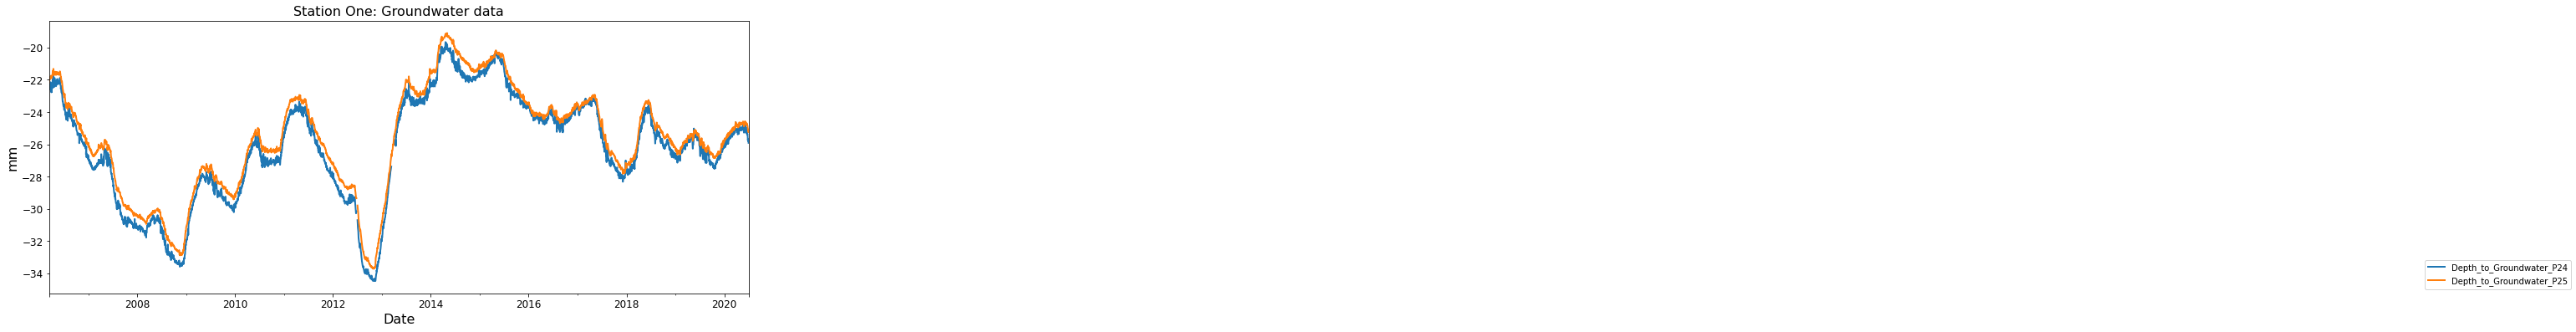

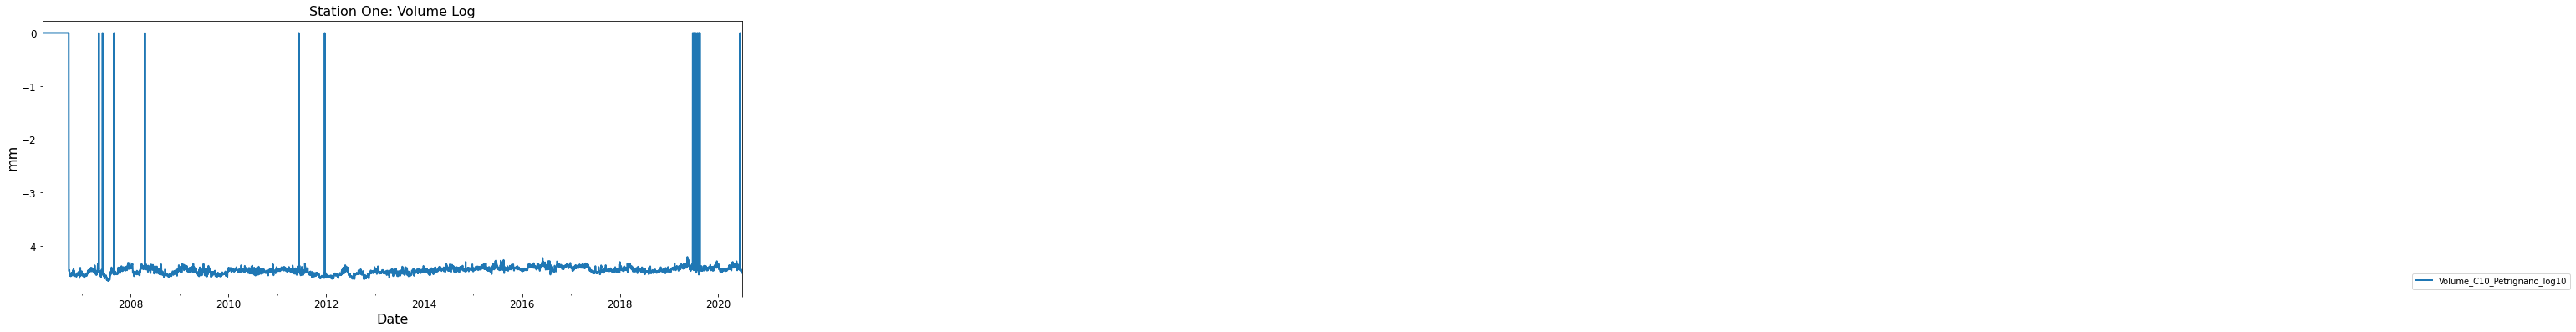

In [12]:
plot_data()

In [13]:
#remove suspicious values seen in the plots
print(df_station_one['Rainfall_Bastia_Umbra'].sort_values(ascending=False).head)
print(df_station_one['Depth_to_Groundwater_P24'].sort_values(ascending=False).head)
print(df_station_one['Depth_to_Groundwater_P25'].sort_values(ascending=False).head)
print(df_station_one['Temperature_Bastia_Umbra'].sort_values(ascending=False).head)
print(df_station_one['Temperature_Petrignano'].sort_values(ascending=False).head)
print(df_station_one['Volume_C10_Petrignano'].sort_values(ascending=False).head)
print(df_station_one['Hydrometry_Fiume_Chiascio_Petrignano'].sort_values(ascending=False).head)


<bound method NDFrame.head of Date
2014-07-29    67.3
2019-07-28    60.2
2013-11-11    59.4
2013-06-02    56.5
2016-07-24    55.4
              ... 
2008-12-27     NaN
2008-12-28     NaN
2008-12-29     NaN
2008-12-30     NaN
2008-12-31     NaN
Name: Rainfall_Bastia_Umbra, Length: 5223, dtype: float64>
<bound method NDFrame.head of Date
2014-04-21   -19.66
2014-04-27   -19.71
2014-04-20   -19.74
2014-04-28   -19.80
2014-05-02   -19.80
              ...  
2019-03-24      NaN
2020-03-29      NaN
2020-03-30      NaN
2020-03-31      NaN
2020-04-01      NaN
Name: Depth_to_Groundwater_P24, Length: 5223, dtype: float64>
<bound method NDFrame.head of Date
2014-05-03   -19.10
2014-05-02   -19.12
2014-04-27   -19.13
2014-05-04   -19.14
2014-04-21   -19.15
              ...  
2019-03-24      NaN
2020-03-29      NaN
2020-03-30      NaN
2020-03-31      NaN
2020-04-01      NaN
Name: Depth_to_Groundwater_P25, Length: 5223, dtype: float64>
<bound method NDFrame.head of Date
2017-08-03    33.0
2017-08-0

In [14]:
#replace missing value noted with '0' by the previous data
df_station_one['Volume_C10_Petrignano'] = df_station_one['Volume_C10_Petrignano'].replace(to_replace=0, method='ffill')

#replace nan value with mean of the month of the year
#first create two columns with the month and the year
df_station_one['Month'] = pd.DatetimeIndex(df_station_one.index).month
df_station_one['Year'] = pd.DatetimeIndex(df_station_one.index).year

#replace nan value by the mean of the month of the year 
df_station_one.fillna(df_station_one.groupby(['Month','Year']).transform('mean'),inplace=True)

#if the nan value still persists, replace with the yearly min 
df_station_one.fillna(df_station_one.groupby(['Month']).transform('mean'),inplace=True)


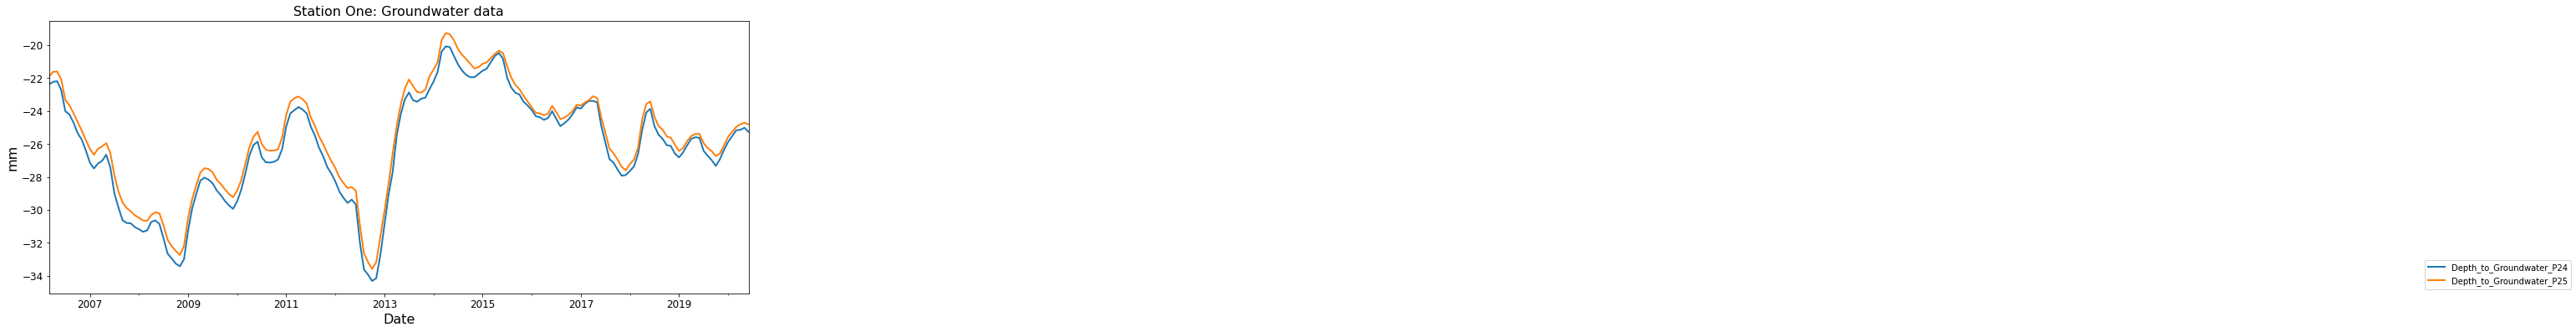

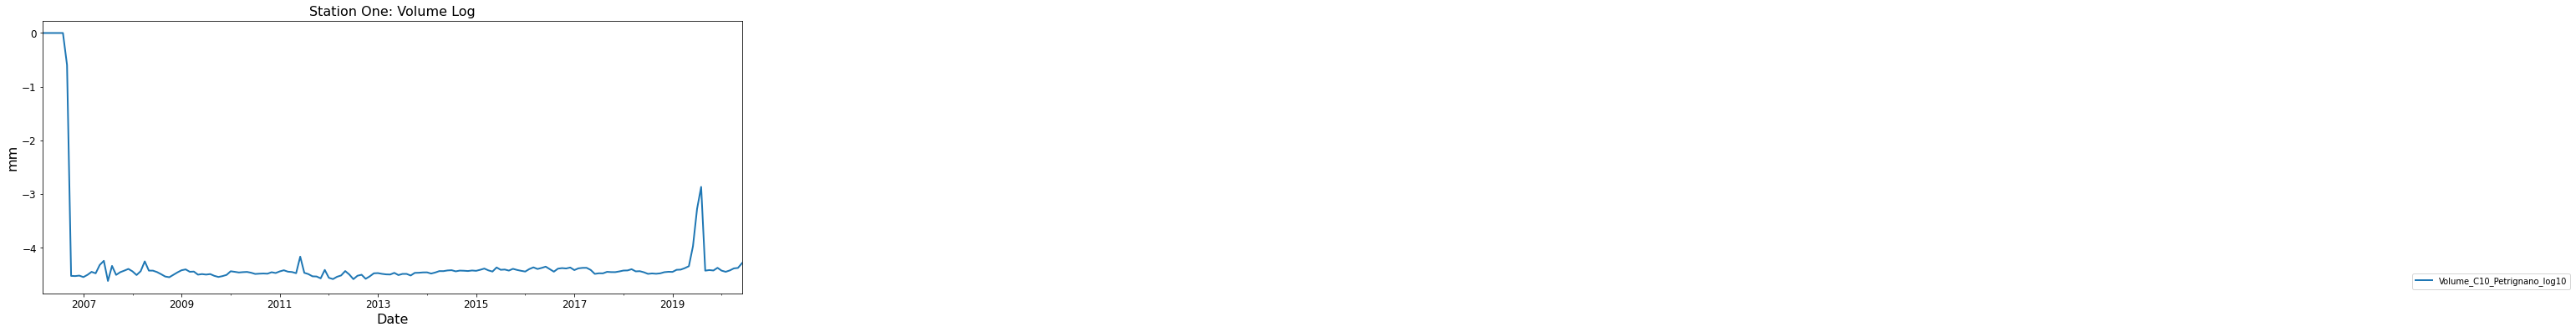

In [15]:
#now resample looking at the monthly value 
df_station_one = df_station_one.resample('M').mean()

plot_data()

In [16]:
#calculate monthly mean temperature, mean rainfall and mean groundwater levels  
df_station_one['mean_temperature'] = df_station_one[['Temperature_Bastia_Umbra','Temperature_Petrignano']].mean(axis=1)
df_station_one['mean_rainfall'] = df_station_one[Station_one_rainfall].mean(axis=1)
df_station_one['mean_groundwater'] = df_station_one[Station_one_groundwater].mean(axis=1)

#total monthly volume of pumping water
df_station_one['sum_volume_log'] = df_station_one[Station_one_volume_log].mean(axis=1)




In [17]:
df_station_one.head()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Volume_C10_Petrignano_log10,Month,Year,mean_temperature,mean_rainfall,mean_groundwater,sum_volume_log
Date,,,,,,,,,,,,,,
2006-03-31,1.884946,-22.396667,-21.921111,10.140860,9.721505,-27755.613788,2.704032,0.0,3.0,2006.0,9.931183,1.884946,-22.158889,0.0
2006-04-30,1.444722,-22.232333,-21.621000,14.183889,13.360833,-27629.697600,2.473889,0.0,4.0,2006.0,13.772361,1.444722,-21.926667,0.0
2006-05-31,2.080108,-22.197419,-21.608065,17.676075,15.405376,-27517.991889,2.314516,0.0,5.0,2006.0,16.540726,2.080108,-21.902742,0.0
2006-06-30,1.129167,-22.734483,-22.077000,22.707778,19.936667,-28924.222629,2.164444,0.0,6.0,2006.0,21.322222,1.129167,-22.405741,0.0
2006-07-31,1.113490,-24.022258,-23.324516,25.861290,22.285924,-30789.396804,1.974780,0.0,7.0,2006.0,24.073607,1.113490,-23.673387,0.0


In [18]:
filtered_df_station_one = df_station_one['mean_groundwater']
print(filtered_df_station_one)

Date
2006-03-31   -22.158889
2006-04-30   -21.926667
2006-05-31   -21.902742
2006-06-30   -22.405741
2006-07-31   -23.673387
                ...    
2020-02-29   -25.392414
2020-03-31   -25.067679
2020-04-30   -24.975345
2020-05-31   -24.868065
2020-06-30   -25.040833
Freq: M, Name: mean_groundwater, Length: 172, dtype: float64


In [19]:
filtered_df_station_one.to_csv('cleaned_station_one.csv', sep='\t')